In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/NSA Snort/alert_full.csv", usecols=['Class', 'Src', 'Dest', 'Protocol','Priority'])

In [3]:
df.Priority.value_counts()

1    39301
3    12372
2    10432
Name: Priority, dtype: int64

In [4]:
#df = df[(df.Class.isin(['Misc activity', 'Attempted Information Leak', 'Potentially Bad Traffic', 'Attempted Denial of Service']))]

In [5]:
df.Protocol.value_counts()

TCP    62105
Name: Protocol, dtype: int64

In [6]:
# df.Priority.value_counts()
# df = df[(df.Priority.isin(['2','3']))]
# df.Priority.value_counts()


In [7]:
df.Protocol.value_counts()
df = df[(df.Protocol.isin(['ICMP', 'TCP', 'UDP']))]
df.Protocol.value_counts()

TCP    62105
Name: Protocol, dtype: int64

In [8]:
df = df.astype("string")
df.dtypes

Priority    string
Src         string
Dest        string
Protocol    string
Class       string
dtype: object

In [9]:
df['isMal'] = df.Class.apply(lambda x: 0 if x == 'Misc activity' else 1)

In [10]:
df = df.astype("string")
df.dtypes

Priority    string
Src         string
Dest        string
Protocol    string
Class       string
isMal       string
dtype: object

In [11]:
df.columns = ['Priority', 'SrcIP', 'DestIP', 'Protocol', 'Class', 'isMal']

In [12]:
df = df[['Class','Priority', 'Protocol','SrcIP', 'DestIP', 'isMal']]

In [13]:
df.isMal = df.isMal.astype(int)

In [14]:
df.dtypes

Class       string
Priority    string
Protocol    string
SrcIP       string
DestIP      string
isMal        int32
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('isMal',axis=1)
y = df[['isMal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [16]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    data['Class'] = number.fit_transform(data.Class)
    data['Protocol'] = number.fit_transform(data.Protocol)
    data['SrcIP'] = number.fit_transform(data.SrcIP)
    data['DestIP'] = number.fit_transform(data.DestIP)
    data=data.fillna(-999)
    return data

train=convert(X_train)
test=convert(X_test)

<ipython-input-16-8bf84c749c66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = number.fit_transform(data.Class)
<ipython-input-16-8bf84c749c66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Protocol'] = number.fit_transform(data.Protocol)
<ipython-input-16-8bf84c749c66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, y_train)

In [18]:
import pickle

In [19]:
with open("Datasets/clf.pkl", 'wb') as f:
    pickle.dump(clf, f)

In [20]:
!pip install matplotlib

[Text(133.92000000000002, 181.2, 'X[1] <= 2.5\ngini = 0.318\nsamples = 49684\nvalue = [9856, 39828]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 39823\nvalue = [0, 39823]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 8.0\ngini = 0.001\nsamples = 9861\nvalue = [9856, 5]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 9856\nvalue = [9856, 0]')]

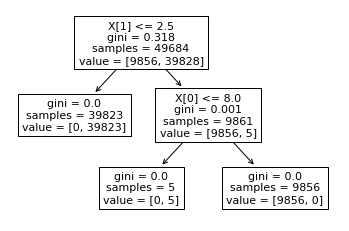

In [21]:
tree.plot_tree(clf)

In [22]:
y_pred = clf.predict(test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2511,    0],
       [   0, 9910]], dtype=int64)